In [1]:
import modAL

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
import seaborn as sns; sns.set()
from sklearn import mixture
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [3]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.9,stratify=y_train)
# print(X_train.shape)

In [5]:
# Y_test.shape

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

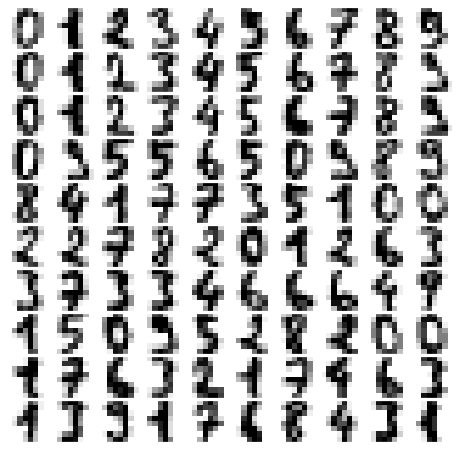

In [7]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8,8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

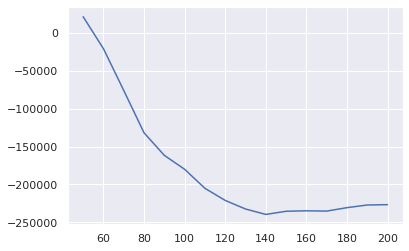

In [9]:
n_components = np.arange(50, 210, 10)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=42)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [10]:
gmm = mixture.GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [11]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

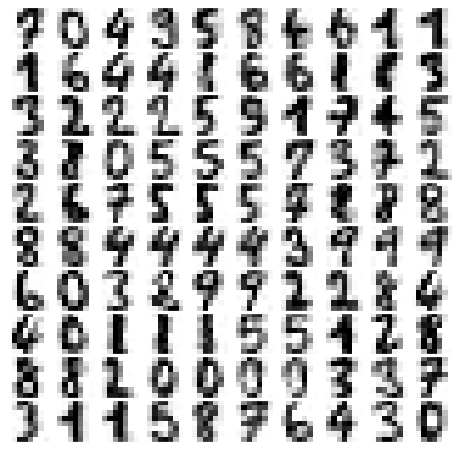

In [12]:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

In [13]:
digits_new.shape

(100, 64)

In [14]:
X_trainn, X_testt,y_trainn, y_testt = train_test_split(digits.data,digits.target,test_size=0.99, stratify=digits.target)

In [15]:
print(X_trainn.shape,X_testt.shape)

(17, 64) (1780, 64)


In [16]:
from sklearn.ensemble import RandomForestClassifier 
from modAL.models import ActiveLearner, Committee
from modAL.uncertainty import uncertainty_sampling

In [17]:
#Defining a learner with Uncertainty Sampling Strategy 
learner= ActiveLearner(estimator=RandomForestClassifier(random_state=0),X_training=X_trainn, y_training=y_trainn, query_strategy=uncertainty_sampling)  

#Calculating the initial accuracy with no queries from the pool
initial_score_0 = learner.score(X_testt,y_testt)
print(initial_score_0)

0.55


In [18]:
def plot_single(data):
    fig, ax = plt.subplots(1, 1, figsize=(1, 1),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    im = ax.imshow(data.reshape(8,8),cmap='binary')
    im.set_clim(0, 16)


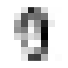

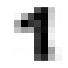

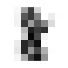

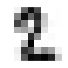

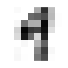

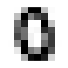

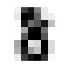

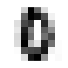

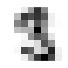

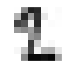

In [19]:
uncertainty_scores=[initial_score_0]
unc_idx=[]
#Creating a copy of Pool set
X_pool_entropy = digits_new 
# Y_pool_entropy= Y_pool 
#Querying 30 samples based on uncertainty strategy 
for idx in range(10):
  query_id, query_instance = learner.query(X_pool_entropy) 
  unc_idx.append(query_id)
  plot_single(X_pool_entropy[query_id])
  #learner.teach(X_pool_entropy[query_id], Y_pool_entropy[query_id]) 
  X_pool_entropy = np.delete(X_pool_entropy, query_id, axis=0) 
  #Y_pool_entropy = np.delete(Y_pool_entropy, query_id)
  #uncertainty_scores.append(learner.score(X_test,Y_test))